<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/%EC%9D%98%EB%A3%8C%EB%B9%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_(%EC%8B%A4%EC%8A%B5%EC%9A%A905)_%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <5> 의료비 데이터

"의료비는 성별, 흡연, 음주, 부양가족수 등과 어떤 상관관계가 있을까?"

### 🚩 파일 다운로드 [>> 클릭]
[출처 - kaggle](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)

# 0. 한글폰트 설정


1️⃣   한글 폰트 코드 실행
```
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```


In [ ]:
#한글 폰트 설정




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/


2️⃣ **런타임 - 런타임 다시시작**

```
import os
os.kill(os.getpid(), 9)
```

In [ ]:
# 런타임 다시시작





3️⃣  **글꼴 지정 명령어**
```
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
```

In [ ]:
# matplotlib 라이브러리, 폰트 지정






# 1. 파일 업로드

```
from google.colab import files
uploaded = files.upload()
```

In [ ]:
#파일 업로드



Saving insurance.csv to insurance.csv


### csv 파일을 읽어서 DataFrame으로 변환하기

```
import pandas as pd

data = pd.read_excel('파일 이름')
data = pd.read_csv('파일 이름', encoding='cp949')
```



In [ ]:
#csv 파일 읽기




In [ ]:
# 데이터의 기본정보 출력



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#데이터의 결측치 값 체크

```
data.isnull().sum()
```

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 데이터 기본정보 파악하기  
```
data.info
```

#데이터 상관관계 분석

<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#모든 속성간의 상관관계를 그래프로 한번에 확인하기
```
import seaborn as sns
sns.pairplot(data)
plt.show()


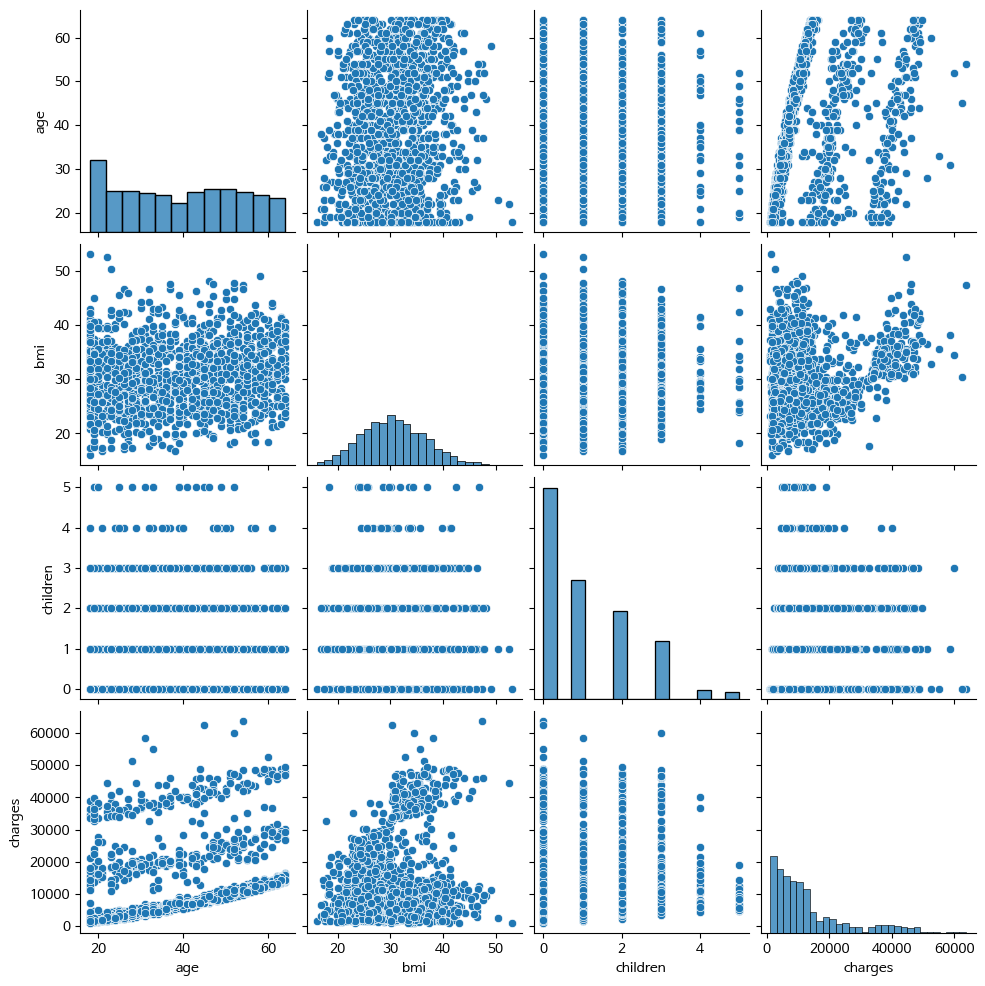

```
sns.heatmap(data.corr(),cmap='BuPu', annot=True) #cmap을 바꿀 것
plt.show()
```
https://r02b.github.io/seaborn_palettes/


<ipython-input-7-138cc2e634ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='BuPu', annot=True)


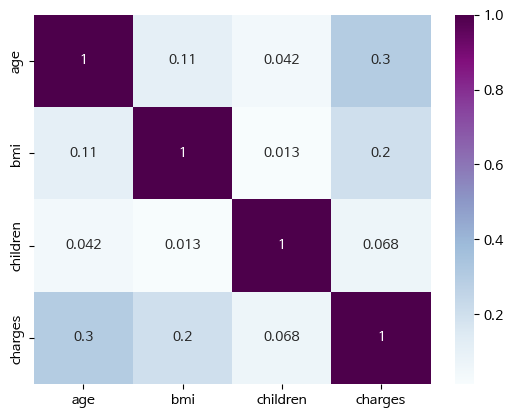

#단순선형 회귀
-나이와 의료비의 상관관계

In [ ]:
# 머신러닝 알고리즘에 학습시킬 속성은 이차원 형태여야 함


In [ ]:
#데이터를 훈련용, 테스트용으로 나눔



#선형회귀모델에 데이터를 훈련시킴



#가중치와 바이어스를 출력


In [ ]:
# 전체 테스트데이터의 예측값을 y_pred에 저장하기




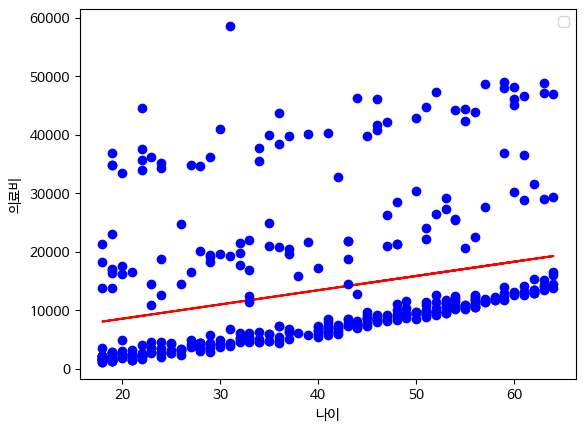

In [ ]:
# 테스트 데이터의 실제값 : 파란색 산점도


# 테스트 데이터의 예측값 : 빨간색 선 그래프





In [ ]:
#모델 평가(예측정확도)



0.10986486060213285

#다중 선형회귀
-나이, bmi 지수와 상관관계

In [ ]:
# 핵심속성과 레이블 분리


# 훈련 데이터, 테스트 데이터 분리


# 선형회귀 모델 생성하고 학습시키기


# 추세선 정보 확인하기


[227.58082576 321.80094624] -5554.006377951004


In [ ]:
# 완성된 모델 lr2의 점수


0.13862602024050819

#모델의 정확도를 높이기 위해 다른 속성도 적용을 해보자
```
흡연여부, bmi 지수를 비만인지 아닌지 측정(30보다 크면 비만)
```

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#새로운 열을 추가하여 흡연여부를 0, 1로 저장
```
import numpy as np
data=data.assign(smoker1=np.nan)
data
```

,age,sex,bmi,children,smoker,region,charges,smoker1
0,19,female,27.900,0,yes,southwest,16884.92400,NaN
1,18,male,33.770,1,no,southeast,1725.55230,NaN
2,28,male,33.000,3,no,southeast,4449.46200,NaN
3,33,male,22.705,0,no,northwest,21984.47061,NaN
4,32,male,28.880,0,no,northwest,3866.85520,NaN
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,NaN
1334,18,female,31.920,0,no,northeast,2205.98080,NaN
1335,18,female,36.850,0,no,southeast,1629.83350,NaN
1336,21,female,25.800,0,no,southwest,2007.94500,NaN


```
data.loc[data['smoker'] == 'yes', 'smoker1'] = 1
data.loc[data['smoker'] == 'no', 'smoker1'] = 0
data
```

,age,sex,bmi,children,smoker,region,charges,smoker1
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


#bmi지수를 30보다 크면 비만으로 판단하여 0,1 로 저장
```
data=data.assign(biman=np.nan)
data
```

,age,sex,bmi,children,smoker,region,charges,smoker1,biman
0,19,female,27.900,0,yes,southwest,16884.92400,1,NaN
1,18,male,33.770,1,no,southeast,1725.55230,0,NaN
2,28,male,33.000,3,no,southeast,4449.46200,0,NaN
3,33,male,22.705,0,no,northwest,21984.47061,0,NaN
4,32,male,28.880,0,no,northwest,3866.85520,0,NaN
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,NaN
1334,18,female,31.920,0,no,northeast,2205.98080,0,NaN
1335,18,female,36.850,0,no,southeast,1629.83350,0,NaN
1336,21,female,25.800,0,no,southwest,2007.94500,0,NaN


```
data.loc[data['bmi'] >=30, 'biman'] = 1
data.loc[data['bmi'] <30, 'biman'] = 0
data
```

,age,sex,bmi,children,smoker,region,charges,smoker1,biman
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   smoker1   1338 non-null   object 
 8   biman     1338 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.2+ KB


#데이터 타입이 숫자가 아니라면 변경해 준다.
```
data = data.astype({'smoker1':'int'})
data
```

,age,sex,bmi,children,smoker,region,charges,smoker1,biman
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   smoker1   1338 non-null   int64  
 8   biman     1338 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 94.2+ KB


#속성 3개-나이, 흡연여부, 비만여부

In [ ]:
# 핵심속성과 레이블 분리


# 훈련 데이터, 테스트 데이터 분리


# 선형회귀 모델 생성하고 학습시키기


# 추세선 정보 확인하기


[  252.60449942 23768.68006729  4175.85750379] -3731.4180856714247


In [ ]:
#모델평가



0.7588442664935728

#속성 4개-나이, 부양가족, 흡연여부, 비만여부

In [ ]:
# 핵심속성과 레이블 분리


# 훈련 데이터, 테스트 데이터 분리


# 선형회귀 모델 생성하고 학습시키기


# 추세선 정보 확인하기


[  250.67492787   387.43428617 23769.83974171  4166.64383201] -4090.070168545024


In [ ]:
#모델평가



0.7623608651172629